In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np 
import pandas as pd
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Reshape,LeakyReLU, Dropout
import tensorflow as tf
from tensorflow.keras.layers import AveragePooling2D,UpSampling2D
from tensorflow import keras

In [3]:
ab = np.load('/users/benzhao/downloads/ab1.npy')
gray = np.load('/users/benzhao/downloads/gray_scale.npy')

In [44]:
gray.shape

(25000, 224, 224)

In [5]:
def batch_prep(gray_img, batch_size=100):
    img=np.zeros((batch_size,224,224,3))
    for i in range(0,3):
        img[:batch_size,:,:,i]=gray_img[:batch_size]
        return img
img_in=batch_prep(gray,batch_size=300)

In [45]:
img_in.shape

(300, 224, 224, 3)

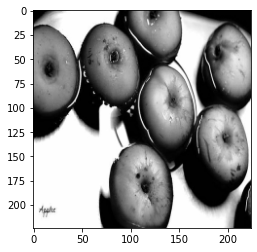

In [6]:
plt.imshow(gray[29],cmap=plt.cm.gray)


In [7]:
def get_rbg(gray_imgs,ab_imgs, n=10):
    img1=np.zeros((n,224,224,3))
    img1[:,:,:,0]=gray_imgs[0:n:]
    img1[:,:,:,1]=gray_imgs[0:n:]
    img1=img1.astype("uint8")
    imgs=[]
    for i in range(0,n):
        imgs.append(cv2.cvtColor(img1[i],cv2.COLOR_LAB2RGB))
        imgs=np.array(imgs)
    return imgs
    

In [48]:
import numpy
def get_rbg(gray_imgs,ab_imgs, n=10):
    img1=np.zeros((n,224,224,3))
    img1[:,:,:,0]=gray_imgs[0:n:]
    img1[:,:,:,1]=gray_imgs[0:n:]
    img1=img1.astype("uint8")
    imgs=[]
    for i in range(0,n):
        imgs.append(cv2.cvtColor(img1[i],cv2.COLOR_LAB2RGB))
        imgs=np.array(imgs)
    return imgs
    

In [55]:
import numpy
def get_rbg(gray_imgs,ab_imgs, n=10):
    img1=np.zeros((n,224,224,3))
    img1[:,:,:,0]=gray_imgs[0:n:]
    img1[:,:,:,1]=gray_imgs[0:n:]
    img1=img1.astype("uint8")
    imgs=[]
    for i in range(0,n):
        np.append(imgs,cv2.cvtColor(img1[i],cv2.COLOR_LAB2RGB))
        imgs=np.array(imgs)
    return imgs
    ## new version

In [56]:
import numpy as np
img_out=get_rbg(gray_imgs=gray,ab_imgs=ab,n=300)

In [41]:
model=Sequential()
model.add(Conv2D(strides=1, kernel_size=3,filters=12,use_bias=True,bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05,maxval=0.05),padding='valid',activation=tf.nn.relu))
model.add(Conv2DTranspose(strides=1,kernel_size=3,filters=12,use_bias=True,bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05,maxval=0.05),padding='valid',activation=tf.nn.relu))
model.add(LeakyReLU(0.6))
model.add(Dropout(0.4))

model.add(Conv2D(strides=1, kernel_size=3,filters=12,use_bias=True,bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05,maxval=0.05),padding='valid',activation=tf.nn.relu))
model.add(Conv2DTranspose(strides=1,kernel_size=3,filters=3,use_bias=True,bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05,maxval=0.05),padding='valid',activation=tf.nn.relu))
model.add(LeakyReLU(0.6))
model.add(Dropout(0.4))

model.add(Conv2D(strides=1, kernel_size=3,filters=12,use_bias=True,bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05,maxval=0.05),padding='valid',activation=tf.nn.relu))
model.add(Conv2DTranspose(strides=1,kernel_size=3,filters=3,use_bias=True,bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05,maxval=0.05),padding='valid',activation=tf.nn.relu))
model.add(LeakyReLU(0.6))
model.add(Dropout(0.4))

model.add(Conv2D(strides=1, kernel_size=3,filters=12,use_bias=True,bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05,maxval=0.05),padding='valid',activation=tf.nn.relu))
model.add(Conv2DTranspose(strides=1,kernel_size=3,filters=3,use_bias=True,bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05,maxval=0.05),padding='valid',activation=tf.nn.relu))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(UpSampling2D((2,2)))
model.add(LeakyReLU(0.6))
model.add(Dropout(0.4))

model.add(Conv2D(strides=1, kernel_size=3,filters=12,use_bias=True,bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05,maxval=0.05),padding='valid',activation=tf.nn.relu))
model.add(Conv2DTranspose(strides=1,kernel_size=3,filters=3,use_bias=True,bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05,maxval=0.05),padding='valid',activation=tf.nn.relu))
model.add(LeakyReLU(0.6))
model.add(Dropout(0.4))



In [42]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='mape',metrics=tf.keras.metrics.Accuracy())


In [43]:
model.fit(img_in,img_out,epochs=10,batch_size=16)

ValueError: Data cardinality is ambiguous:
  x sizes: 300
  y sizes: 0
Make sure all arrays contain the same number of samples.

TypeError: Invalid shape (224, 224, 12) for image data

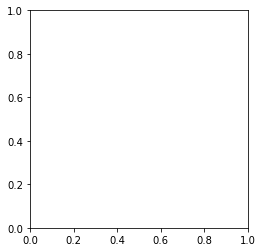

In [21]:
prediction=model.predict(img_in)
plt.imshow(prediction[29])

In [ ]:
model.save['model.h5']

In [ ]:
model2=keras.models.load_model('modelfinal.h5')
prediction=model2.predict(img_in)
plt.imshow(prediction[29].astype('uint8'))

In [57]:
'model.h5'

'model.h5'